# Bank Personal Loan Modelling:- Identifying the Potential Customers for Loans.
 

## Domain:

Banking and Marketing.

## Context:


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers
are liability customers (depositors) with varying sizes of deposits. The number of customers who are
also borrowers (asset customers) is quite small, and the bank is interested in expanding this base
rapidly to bring in more loan business and in the process, earn more through the interest on loans. In
particular, the management wants to explore ways of converting its liability customers to personal loan
customers (while retaining them as depositors).
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over
9% success. This has encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.

## Objective: 

The department wants to build a model that will help them identify the potential customers who have
a higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


## Dataset Description:


The dataset contains data on 5000 customers. The data include customer demographic information
(age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and
the customer response to the last personal loan campaign (Personal Loan). Among these 5000
customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier
campaign.

# Code 

In [1]:
#importing libraries

import numpy as np     # for numerical and array operations
import pandas as pd    # for preprocessing(data collection and extraction)
import matplotlib.pyplot as plt    # for visualizations
import seaborn as sns    # for visualizations
#for plotting graphs within jupyter notebook
%matplotlib inline       

In [2]:
# reading data

data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Performing EDA

In [5]:
data.head(20)       #checking the first few (20) rows of data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
data.tail(20)      #checking the last few (20) rows of data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4980,4981,29,5,135,95762,3,5.30,1,0,1,0,1,1,1
4981,4982,34,9,195,90266,2,3.00,1,122,0,0,0,1,0
4982,4983,36,10,45,95126,4,0.20,1,0,0,0,0,0,1
4983,4984,51,26,72,95370,1,2.90,1,0,0,0,0,0,0
4984,4985,27,1,98,94043,4,2.30,3,0,0,0,0,0,1
4985,4986,48,23,30,94720,3,1.70,2,162,0,0,0,1,0
4986,4987,32,6,78,95825,1,2.90,3,0,0,0,0,0,0
4987,4988,48,23,43,93943,3,1.70,2,159,0,0,0,1,0
4988,4989,34,8,85,95134,1,2.50,1,136,0,0,0,0,1
4989,4990,24,0,38,93555,1,1.00,3,0,0,0,0,1,0


In [9]:
data.info()                #getting the basic info about data like d-type and null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The whole data is in numerical format i.e the data types of all columns is either int or float. So, there is no requirement of changing the data type.

In [10]:
data.describe()                  # to get the essential information about data like quartiles, min, max, mean etc

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
data.corr()                # to check the correlation between all the features of the data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [23]:
# the correlation can also be found out using visuals. We can use a heatmap and also a pairplot
# plotting a heatmap

def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

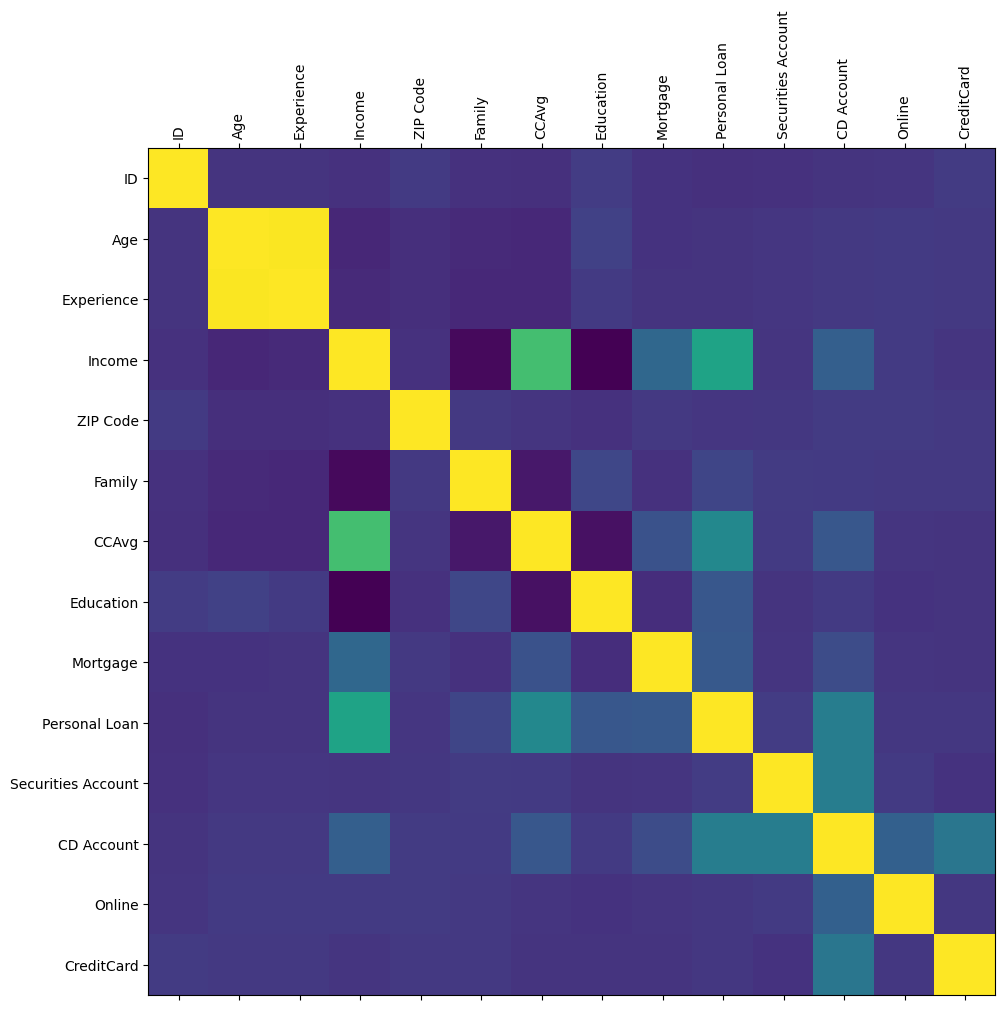

In [24]:
plot_corr(data)

The yellow colour depicts the highest correlation while blue colour depicts the least correlation

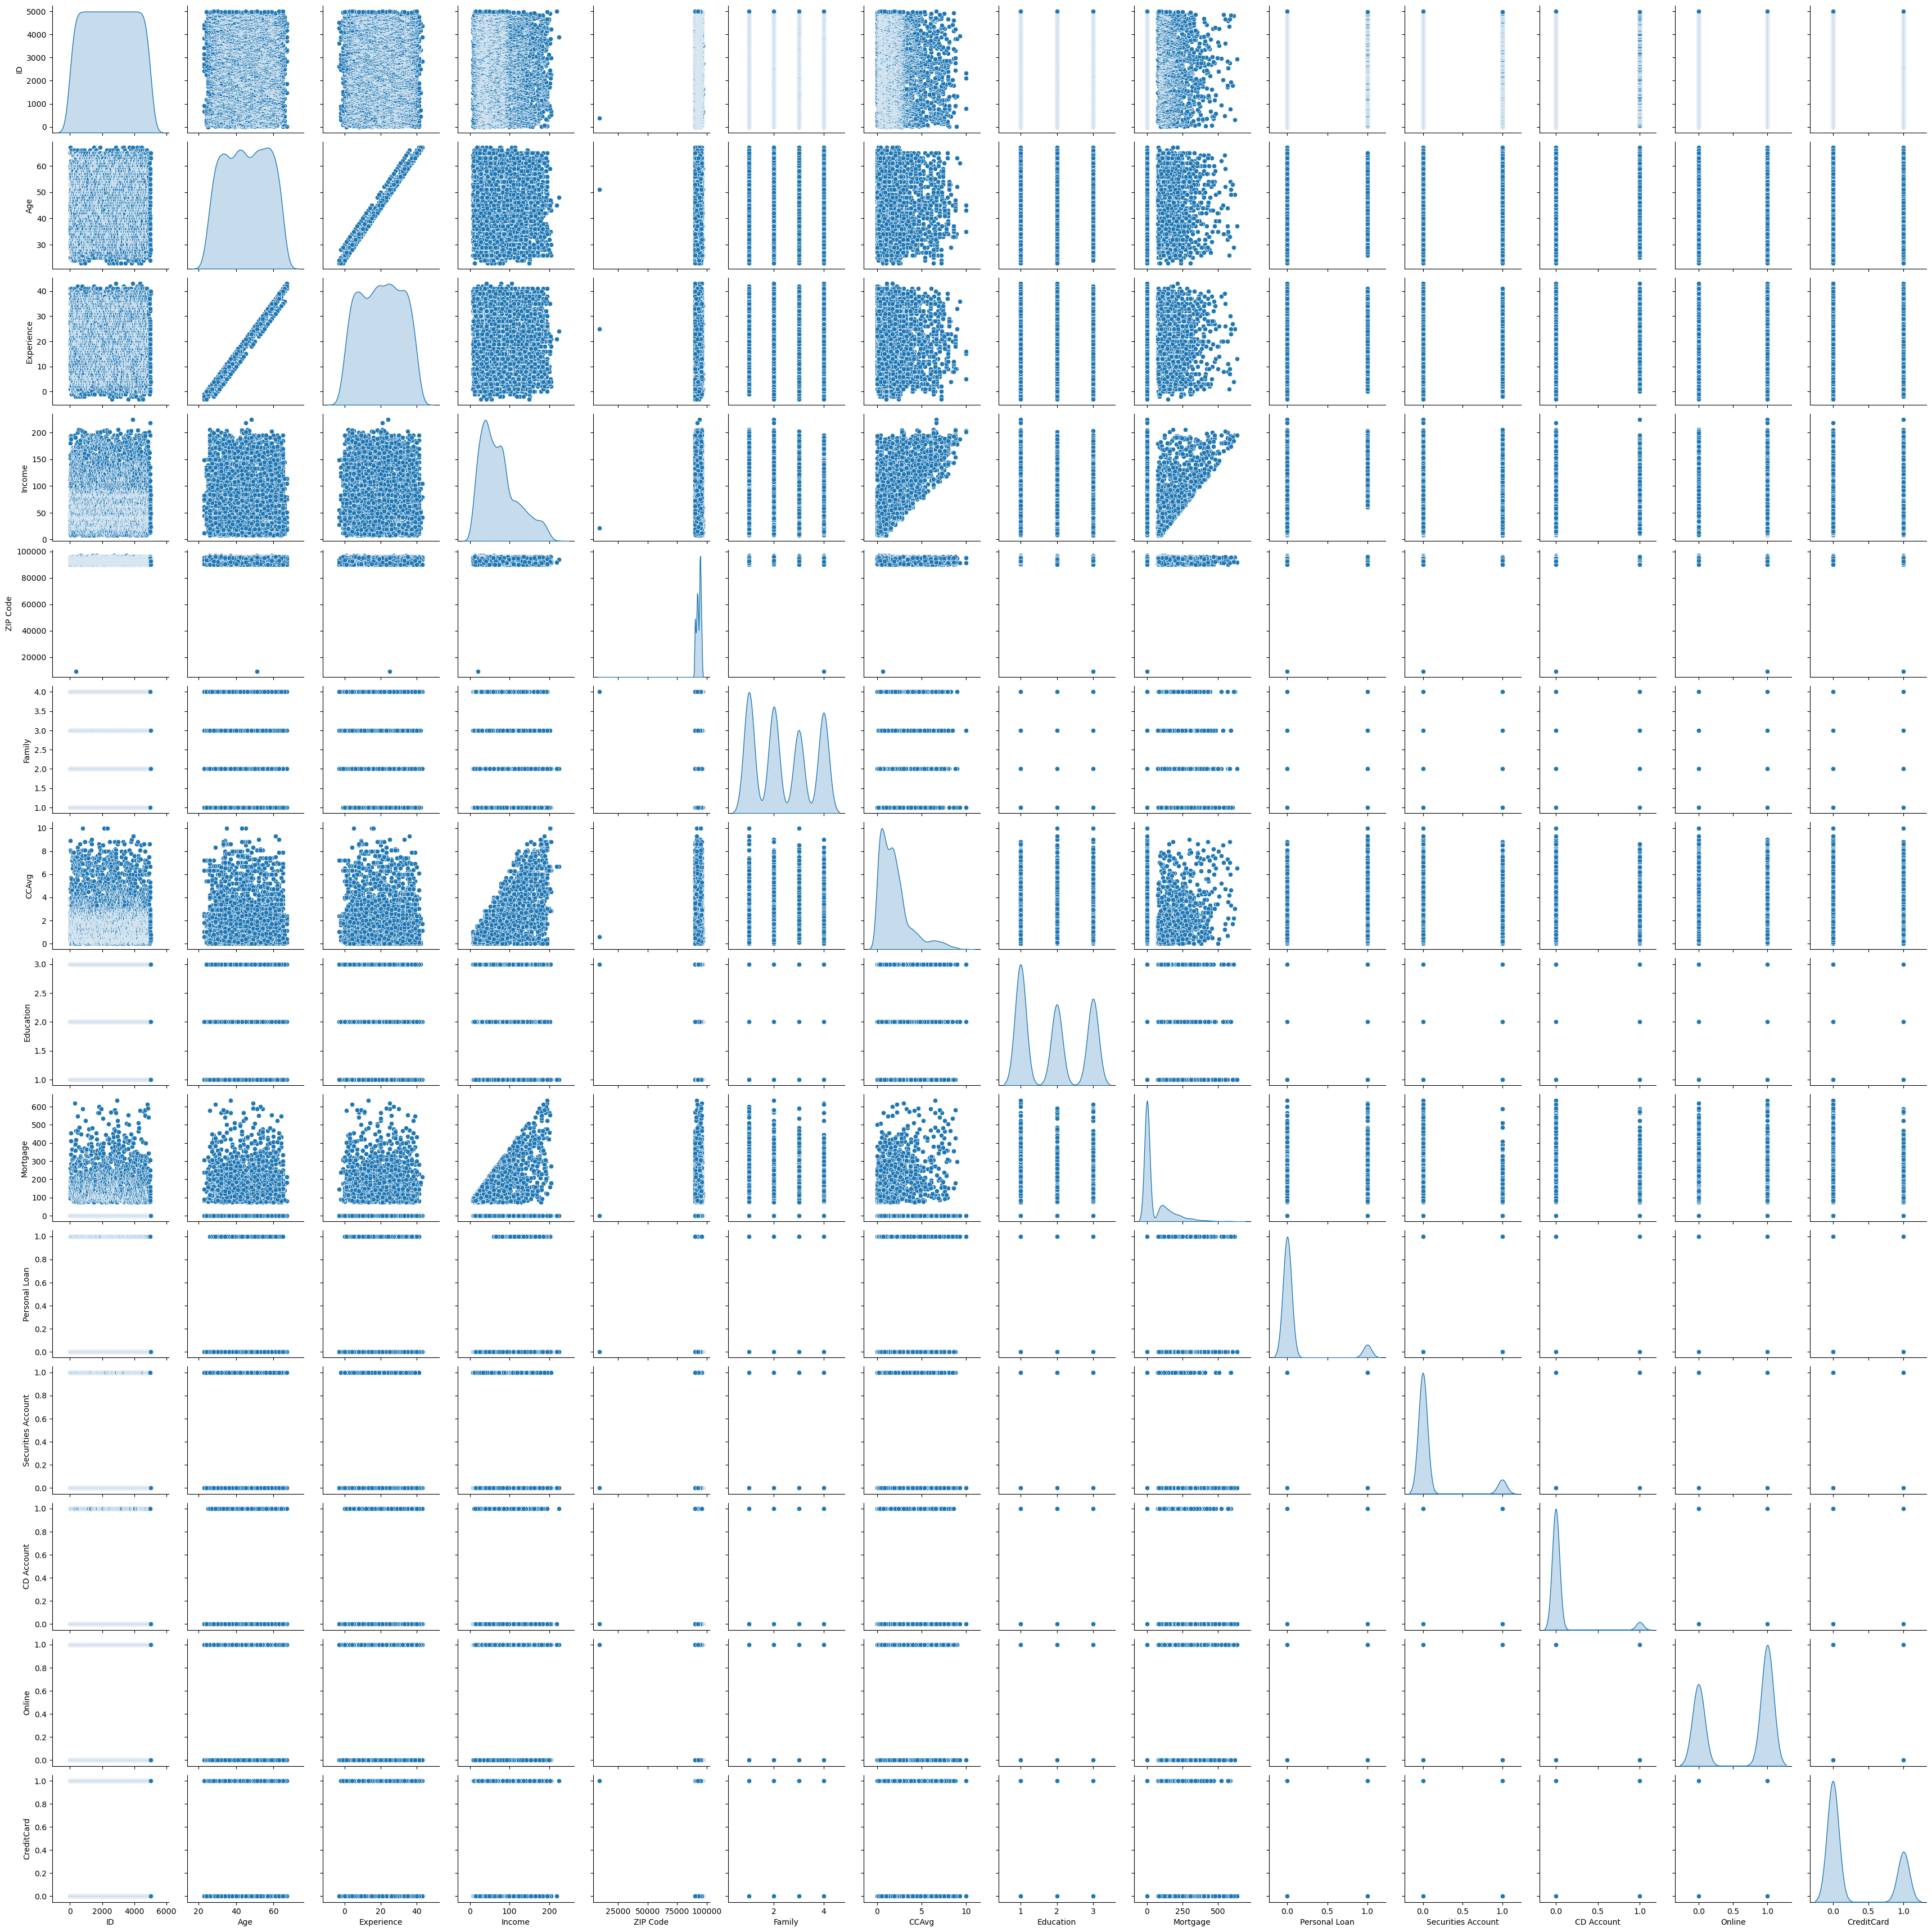

In [25]:
# plotting a pairplot

sns.pairplot(data, diag_kind = 'kde')        #kde is for getting the frequency curve along the diagonal

Even in the above pairplot, we can see that, the graph of Age and experience clearly shows a linear positive relation and, the scatter plot is a straight line i.e there is a high correlation

In [36]:
# cleaning the data
# removing reductant columns

The reductant columns in the above data are ID and Experience. We chose experience because it has a high postive correlation with Age and, on comparision of the correlation of 'Age and Personal Loan' and 'Experience and Personal Loan', we saw that the Age has more impact on Personal Loan compared to that of Experience. 

In [37]:
# rcr stands for reductant columns removed

rcr_data = data.drop(columns = ['ID','Experience'])

In [38]:
rcr_data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


### Normalizing the data

In [39]:
from scipy import stats

n_data = stats.zscore(rcr_data)

In [40]:
n_data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,1.549632
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-0.733757,-0.214694,-1.216855,-0.021710,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4996,-1.338194,-1.276892,-0.525774,1.397414,-0.880087,-1.049078,0.280238,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4997,1.540880,-1.081363,-0.061039,-0.345432,-0.937312,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4998,1.715370,-0.538229,-1.469855,0.525991,-0.822862,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,0.821951,-0.645314


### Fitting a Logistic Regression model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split_test_split

Assigning features as independent and dependent variables. Here, 'x' denotes independent variables and 'y' denotes dependent variables. y contains Personal Loan data while x contains data of the remaining

In [53]:
y = rcr_data['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [54]:
x = n_data.drop(columns = 'Personal Loan')
x

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632
...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-0.733757,-0.214694,-1.216855,-0.021710,1.332484,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
4996,-1.338194,-1.276892,-0.525774,1.397414,-0.880087,-1.049078,0.280238,-0.341423,-0.25354,0.821951,-0.645314
4997,1.540880,-1.081363,-0.061039,-0.345432,-0.937312,1.332484,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4998,1.715370,-0.538229,-1.469855,0.525991,-0.822862,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314


In [55]:
# splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 7)  # 7 is any number

In [56]:
x_train

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
717,1.191902,0.439413,0.371174,0.525991,-0.822862,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,1.549632
2496,1.540880,-0.907560,-0.016734,0.525991,-0.708412,0.141703,0.830857,-0.341423,-0.25354,-1.216618,-0.645314
2469,-0.204013,0.330786,-0.175573,-1.216855,-1.051762,0.141703,2.463051,-0.341423,-0.25354,-1.216618,1.549632
1375,0.406700,2.286070,-0.254757,-1.216855,0.550541,1.332484,-0.555524,-0.341423,-0.25354,-1.216618,1.549632
2742,-0.552992,0.330786,1.229943,-0.345432,-0.880087,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
...,...,...,...,...,...,...,...,...,...,...,...
4307,-0.029524,1.178076,0.836851,1.397414,2.324520,1.332484,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
2550,-1.163704,-1.168265,-0.021918,-1.216855,-0.822862,1.332484,0.447390,-0.341423,-0.25354,0.821951,-0.645314
537,-0.116768,1.243252,-1.147934,-1.216855,1.695044,1.332484,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
1220,-0.378502,1.981915,0.466854,-0.345432,3.469022,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,-0.645314


In [57]:
x_test

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3406,-0.291258,-0.864109,-0.459787,0.525991,0.035515,1.332484,-0.555524,-0.341423,-0.25354,-1.216618,1.549632
757,0.581189,0.156983,-0.663403,0.525991,-0.078935,0.141703,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
3624,1.104657,-0.081996,-0.530016,-1.216855,-0.307836,1.332484,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4544,-1.512683,0.135258,1.256809,0.525991,0.321641,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
3235,1.279146,-0.755483,-0.679429,-0.345432,-0.193385,1.332484,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
...,...,...,...,...,...,...,...,...,...,...,...
460,1.279146,1.460506,-1.355321,-0.345432,0.092740,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,1.549632
2492,-1.512683,1.308428,1.385012,-0.345432,0.664991,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
3028,1.540880,-0.777208,-0.249101,0.525991,-1.051762,1.332484,1.194659,-0.341423,-0.25354,0.821951,1.549632
3437,1.017412,-0.755483,0.542739,1.397414,-0.708412,0.141703,-0.555524,2.928915,-0.25354,0.821951,-0.645314


In [58]:
y_train

717     0
2496    0
2469    0
1375    1
2742    0
       ..
4307    1
2550    0
537     1
1220    0
4271    0
Name: Personal Loan, Length: 3500, dtype: int64

In [59]:
y_test

3406    0
757     0
3624    0
4544    0
3235    0
       ..
460     0
2492    0
3028    0
3437    0
4579    0
Name: Personal Loan, Length: 1500, dtype: int64

In [60]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

The reason why we didnt consider y to be from the normalized dataset is because LogisticRegression wont be taking continuous values. LogisticRegression is used for categorical values and not for continuous variables hence, we consider y from rcr data i.e 0 and 1.

In [63]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Confusion Matrix:

In [64]:
from sklearn import metrics

<AxesSubplot:>

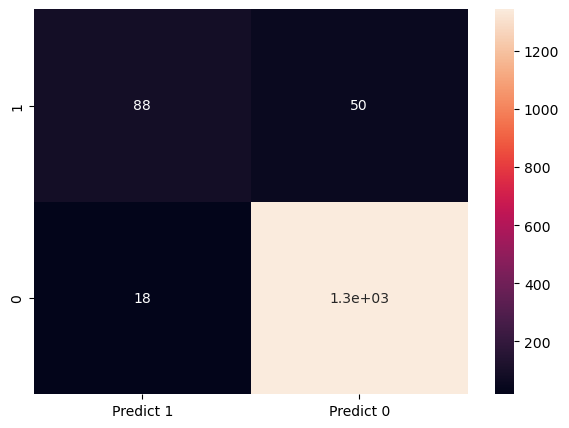

In [69]:
cm = metrics.confusion_matrix(y_test,y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have taken personal loan 88

True Negatives (TN): we correctly predicted that they haven't taken personal loan diabetes 1300+ values

False Positives (FP): we incorrectly predicted that they have taken personal loan (a "Type I error") 18 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they haven't taken personal loan (a "Type II error") 50 Falsely predict negative Type II error